In [ ]:
import pandas_datareader as pdr
import pandas as pd
# k = "1dceb00b00eba08f93b9440b08f94bac5f21583b"

In [ ]:
# data  = pdr.get_data_tiingo('RYSOX',api_key=k)
# data.to_csv('/content/sample_data/S&P.csv')
data = pd.read_csv('/content/sample_data/S&P.csv')
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,RYSOX,2018-09-18 00:00:00+00:00,53.64,53.64,53.64,53.64,0,44.903724,44.903724,44.903724,44.903724,0,0.0,1.0
1,RYSOX,2018-09-19 00:00:00+00:00,53.71,53.71,53.71,53.71,0,44.962323,44.962323,44.962323,44.962323,0,0.0,1.0
2,RYSOX,2018-09-20 00:00:00+00:00,54.13,54.13,54.13,54.13,0,45.313918,45.313918,45.313918,45.313918,0,0.0,1.0
3,RYSOX,2018-09-21 00:00:00+00:00,54.10,54.10,54.10,54.10,0,45.288804,45.288804,45.288804,45.288804,0,0.0,1.0
4,RYSOX,2018-09-24 00:00:00+00:00,53.91,53.91,53.91,53.91,0,45.129749,45.129749,45.129749,45.129749,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,RYSOX,2023-09-11 00:00:00+00:00,69.37,69.37,69.37,69.37,0,69.370000,69.370000,69.370000,69.370000,0,0.0,1.0
1253,RYSOX,2023-09-12 00:00:00+00:00,68.97,68.97,68.97,68.97,0,68.970000,68.970000,68.970000,68.970000,0,0.0,1.0
1254,RYSOX,2023-09-13 00:00:00+00:00,69.06,69.06,69.06,69.06,0,69.060000,69.060000,69.060000,69.060000,0,0.0,1.0
1255,RYSOX,2023-09-14 00:00:00+00:00,69.65,69.65,69.65,69.65,0,69.650000,69.650000,69.650000,69.650000,0,0.0,1.0


In [ ]:
df1 = data.reset_index()['close']
df1

0       53.64
1       53.71
2       54.13
3       54.10
4       53.91
        ...  
1252    69.37
1253    68.97
1254    69.06
1255    69.65
1256    68.80
Name: close, Length: 1257, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

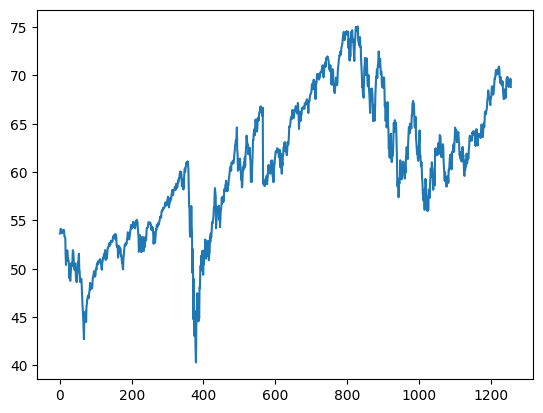

In [ ]:
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler ##Lstm Sensitive to scale of data
scaler = MinMaxScaler(feature_range=(0,1)) ## values b/w 0 to 1
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1257, 1)

In [ ]:
# train data and test data allocation

training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1005, 252)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_test.shape)
print(ytest.shape)

(151, 100)
(151,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_15 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 11s 353ms/step - loss: 0.1264 - val_loss: 0.0354
Epoch 2/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0184 - val_loss: 0.0026
Epoch 3/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0080 - val_loss: 0.0018
Epoch 4/100
15/15 [==============================] - 3s 183ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 5/100
15/15 [==============================] - 6s 393ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 6/100
15/15 [==============================] - 2s 166ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 7/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 8/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 9/100
15/15 [==============================] - 3s 205ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 10/100
15/15 [==============================] - 3s 193ms/step - loss: 0.0037 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 35ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
rmse_train_lstm = math.sqrt(mean_squared_error(y_train,train_predict))
rmse_train_lstm

60.50868350205695

In [ ]:
### Test Data RMSE
rmse_test_lstm = math.sqrt(mean_squared_error(ytest,test_predict))
rmse_test_lstm

64.5013189261503

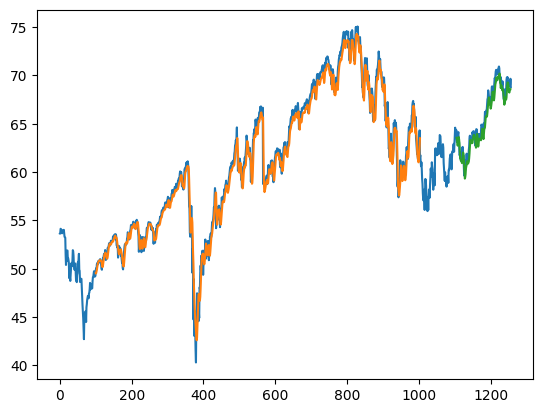

In [ ]:
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

252

In [ ]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.6510356731875719,
 0.6441311852704257,
 0.6792289988492519,
 0.694476409666283,
 0.6936133486766398,
 0.6720368239355581,
 0.6590909090909092,
 0.64614499424626,
 0.6795166858457999,
 0.6800920598388953,
 0.6717491369390103,
 0.6798043728423475,
 0.6772151898734178,
 0.6743383199079402,
 0.6800920598388953,
 0.6682968929804374,
 0.6901611047180669,
 0.7079976985040275,
 0.7051208285385502,
 0.7054085155350978,
 0.6846950517836592,
 0.6708860759493671,
 0.6869965477560416,
 0.7108745684695055,
 0.7108745684695055,
 0.6999424626006905,
 0.7183544303797467,
 0.7456846950517837,
 0.741944764096663,
 0.7462600690448791,
 0.7390678941311852,
 0.7508630609896434,
 0.7528768699654775,
 0.7707134637514386,
 0.7839470655926353,
 0.7859608745684696,
 0.8098388952819333,
 0.8020713463751441,
 0.7928653624856157,
 0.7827963176064443,
 0.7899884925201384,
 0.7747410817031071,
 0.7661104718066747,
 0.7879746835443038,
 0.7871116225546604,
 0.796029919447641,
 0.8199079401611047,
 0.821921749136939

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.81659126]
101
1 day input [0.64413119 0.679229   0.69447641 0.69361335 0.67203682 0.65909091
 0.64614499 0.67951669 0.68009206 0.67174914 0.67980437 0.67721519
 0.67433832 0.68009206 0.66829689 0.6901611  0.7079977  0.70512083
 0.70540852 0.68469505 0.67088608 0.68699655 0.71087457 0.71087457
 0.69994246 0.71835443 0.7456847  0.74194476 0.74626007 0.73906789
 0.75086306 0.75287687 0.77071346 0.78394707 0.78596087 0.8098389
 0.80207135 0.79286536 0.78279632 0.78998849 0.77474108 0.76611047
 0.78797468 0.78711162 0.79602992 0.81990794 0.82192175 0.81818182
 0.80264672 0.79718067 0.80178366 0.81501726 0.82940161 0.84637514
 0.84407365 0.8518412  0.86593786 0.87082854 0.85730725 0.85759494
 0.86565017 0.87140391 0.87082854 0.85788262 0.87773303 0.88089758
 0.87543153 0.8472382  0.84205984 0.83141542 0.84925201 0.8406214
 0.82681243 0.8273878  0.82537399 0.83659379 0.81386651 0.79919448
 0.78423475 0.78394707 0.79718067 0.79171461 0.81329114 0.78653625
 0.79976985 0.8118527  0.8406214  0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1257

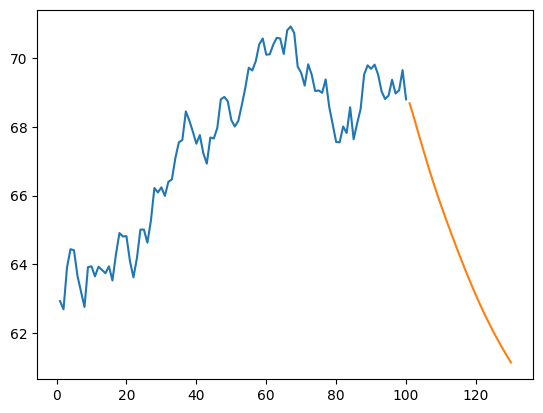

In [ ]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

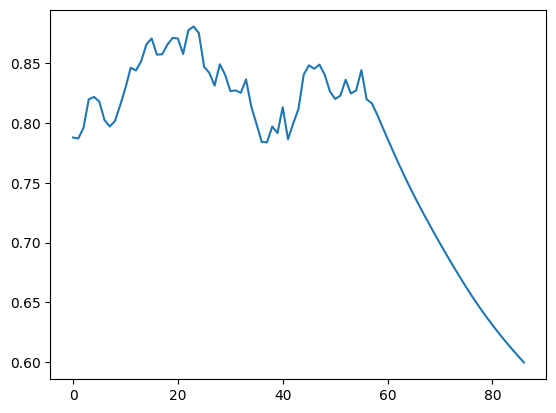

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

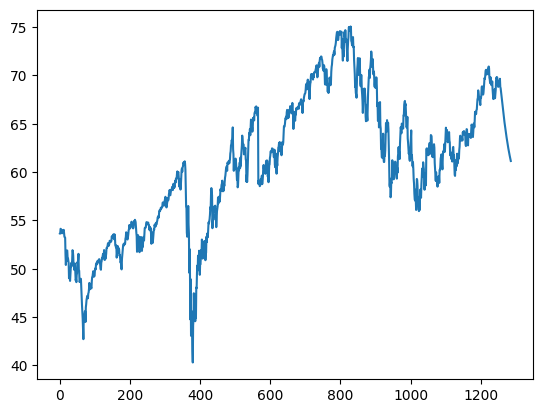

In [ ]:
plt.plot(df3)

# **LSTM + Dense Nureal**

In [ ]:
model_combined = Sequential()
model_combined.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_combined.add(LSTM(50, return_sequences=True))
model_combined.add(LSTM(50))
model_combined.add(Dense(50, activation='relu'))  # Add a dense layer
model_combined.add(Dense(1))
model_combined.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_combined.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 [==============================] - 13s 446ms/step - loss: 0.1308 - val_loss: 0.0299
Epoch 2/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0160 - val_loss: 0.0030
Epoch 3/100
15/15 [==============================] - 2s 159ms/step - loss: 0.0090 - val_loss: 0.0019
Epoch 4/100
15/15 [==============================] - 2s 159ms/step - loss: 0.0061 - val_loss: 0.0019
Epoch 5/100
15/15 [==============================] - 4s 239ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 6/100
15/15 [==============================] - 2s 157ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 7/100
15/15 [==============================] - 2s 161ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 8/100
15/15 [==============================] - 2s 159ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 9/100
15/15 [==============================] - 2s 162ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 10/100
15/15 [==============================] - 3s 237ms/step - loss: 0.0041 - val_l

In [ ]:
train_predict_combined = model_combined.predict(X_train)
test_predict_combined = model_combined.predict(X_test)

5/5 [==============================] - 0s 31ms/step


In [ ]:
train_predict_combined = scaler.inverse_transform(train_predict_combined)
test_predict_combined = scaler.inverse_transform(test_predict_combined)

In [ ]:
rmse_train_combined = np.sqrt(mean_squared_error(y_train, train_predict_combined))
rmse_test_combined = np.sqrt(mean_squared_error(ytest, test_predict_combined))

In [ ]:
print(rmse_train_combined)
print(rmse_test_combined)

39.52691600583052
39.35552701324161


# **Stacked LSTMs with Regularization**

In [ ]:
from tensorflow.keras.layers import Dropout

# Define the LSTM model with dropout layers
model_lstm_dropout = Sequential()
model_lstm_dropout.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_lstm_dropout.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model_lstm_dropout.add(LSTM(50, return_sequences=True))
model_lstm_dropout.add(Dropout(0.2))
model_lstm_dropout.add(LSTM(50))
model_lstm_dropout.add(Dense(1))
model_lstm_dropout.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model_lstm_dropout.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 11s 252ms/step - loss: 0.0785 - val_loss: 0.0386
Epoch 2/100
15/15 [==============================] - 3s 169ms/step - loss: 0.0154 - val_loss: 0.0028
Epoch 3/100
15/15 [==============================] - 3s 168ms/step - loss: 0.0078 - val_loss: 0.0017
Epoch 4/100
15/15 [==============================] - 4s 246ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 5/100
15/15 [==============================] - 3s 168ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 6/100
15/15 [==============================] - 2s 166ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 7/100
15/15 [==============================] - 3s 166ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 8/100
15/15 [==============================] - 3s 213ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 9/100
15/15 [==============================] - 3s 207ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 10/100
15/15 [==============================] - 3s 169ms/step - loss: 0.0044 - val_l

In [ ]:
train_predict_dropout = model_lstm_dropout.predict(X_train)
test_predict_dropout = model_lstm_dropout.predict(X_test)

5/5 [==============================] - 0s 32ms/step


In [ ]:
### Calculate RMSE performance metrics
train_predict_dropout=scaler.inverse_transform(train_predict_dropout)
test_predict_dropout=scaler.inverse_transform(test_predict_dropout)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse_train_lstm_drop = math.sqrt(mean_squared_error(y_train,train_predict_dropout))
print(rmse_train_lstm_drop)
rmse_test_lstm_drop = math.sqrt(mean_squared_error(ytest,test_predict_dropout))
print(rmse_test_lstm_drop)

39.47500748970615
39.30781271156046


# **CNN-LSTM Hybrid**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

# Define a CNN-LSTM hybrid model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(50, return_sequences=True))
model_cnn_lstm.add(LSTM(50))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Train and evaluate the model as before


In [ ]:
model_cnn_lstm.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 132ms/step - loss: 0.0847 - val_loss: 0.0324
Epoch 2/100
15/15 [==============================] - 2s 106ms/step - loss: 0.0155 - val_loss: 0.0023
Epoch 3/100
15/15 [==============================] - 2s 110ms/step - loss: 0.0077 - val_loss: 0.0018
Epoch 4/100
15/15 [==============================] - 1s 70ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 5/100
15/15 [==============================] - 1s 68ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 6/100
15/15 [==============================] - 1s 69ms/step - loss: 0.0047 - val_loss: 0.0014
Epoch 7/100
15/15 [==============================] - 1s 68ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 8/100
15/15 [==============================] - 1s 68ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 9/100
15/15 [==============================] - 1s 67ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 10/100
15/15 [==============================] - 1s 67ms/step - loss: 0.0040 - val_loss: 0.0

In [165]:
train_predict_cnn = model_cnn_lstm.predict(X_train)
test_predict_cnn = model_cnn_lstm.predict(X_test)

5/5 [==============================] - 0s 15ms/step


In [166]:
train_predict_cnn = scaler.inverse_transform(train_predict_cnn)
test_predict_cnn = scaler.inverse_transform(test_predict_cnn)

In [167]:
rmse_train_cnn = np.sqrt(mean_squared_error(y_train, train_predict_cnn))
rmse_test_cnn = np.sqrt(mean_squared_error(ytest, test_predict_cnn))

In [168]:
print(rmse_train_cnn)
print(rmse_test_cnn)

40.000442368719334
39.93382418025153


In [169]:
print("LSTM",rmse_test_lstm)
print("\nLSTM + Dense nureal : ",rmse_test_combined)
print("\nLSTM + Regularization : ",rmse_test_lstm_drop)
print("\nLSTM-CNN Hybride : ",rmse_test_cnn)


LSTM 64.5013189261503

LSTM + Dense nureal :  39.35552701324161

LSTM + Regularization :  39.30781271156046

LSTM-CNN Hybride :  39.93382418025153


In [181]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(100, 1)))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(GRU(50))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')

In [182]:
model_gru.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 11s 261ms/step - loss: 0.0732 - val_loss: 0.0184
Epoch 2/100
15/15 [==============================] - 3s 202ms/step - loss: 0.0128 - val_loss: 0.0029
Epoch 3/100
15/15 [==============================] - 3s 200ms/step - loss: 0.0054 - val_loss: 0.0013
Epoch 4/100
15/15 [==============================] - 2s 167ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 5/100
15/15 [==============================] - 2s 165ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 6/100
15/15 [==============================] - 2s 161ms/step - loss: 0.0016 - val_loss: 5.2191e-04
Epoch 7/100
15/15 [==============================] - 3s 236ms/step - loss: 0.0014 - val_loss: 4.8955e-04
Epoch 8/100
15/15 [==============================] - 2s 159ms/step - loss: 0.0014 - val_loss: 4.8662e-04
Epoch 9/100
15/15 [==============================] - 2s 162ms/step - loss: 0.0013 - val_loss: 5.8573e-04
Epoch 10/100
15/15 [==============================] - 2s 161ms/step - loss

In [183]:
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

5/5 [==============================] - 0s 30ms/step


In [184]:
rmse_train_gru = np.sqrt(mean_squared_error(y_train, train_predict_gru))
rmse_test_gru = np.sqrt(mean_squared_error(ytest, test_predict_gru))

In [185]:
print(rmse_train_gru)
print(rmse_test_gru)

0.030276899444097113
0.026886604778902017


In [186]:
model_lstm_gru = Sequential()
model_lstm_gru.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_lstm_gru.add(LSTM(50, return_sequences=True))
model_lstm_gru.add(GRU(50, return_sequences=True))  # Adding a GRU layer
model_lstm_gru.add(GRU(50))
model_lstm_gru.add(Dense(1))
model_lstm_gru.compile(loss='mean_squared_error', optimizer='adam')

In [187]:
model_lstm_gru.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 13s 412ms/step - loss: 0.1054 - val_loss: 0.0406
Epoch 2/100
15/15 [==============================] - 3s 216ms/step - loss: 0.0182 - val_loss: 0.0035
Epoch 3/100
15/15 [==============================] - 3s 213ms/step - loss: 0.0088 - val_loss: 0.0016
Epoch 4/100
15/15 [==============================] - 4s 298ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 5/100
15/15 [==============================] - 4s 245ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 6/100
15/15 [==============================] - 3s 220ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 7/100
15/15 [==============================] - 4s 247ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 8/100
15/15 [==============================] - 4s 267ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 9/100
15/15 [==============================] - 3s 214ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 10/100
15/15 [==============================] - 3s 213ms/step - loss: 0.0031 - val_l

In [188]:
train_predict_lstm_gru = model_lstm_gru.predict(X_train)
test_predict_lstm_gru = model_lstm_gru.predict(X_test)

5/5 [==============================] - 0s 41ms/step


In [189]:
rmse_train_lstm_gru = np.sqrt(mean_squared_error(y_train, train_predict_lstm_gru))
rmse_test_lstm_gru = np.sqrt(mean_squared_error(ytest, test_predict_lstm_gru))

In [190]:
print(rmse_train_lstm_gru)
print(rmse_test_lstm_gru)

0.026259977646700447
0.017287859211553253


In [191]:
print("LSTM : ",rmse_test_lstm)
print("\nLSTM + Dense nureal : ",rmse_test_combined)
print("\nLSTM + Regularization : ",rmse_test_lstm_drop)
print("\nLSTM-CNN Hybride : ",rmse_test_cnn)
print("\nGRU : ",rmse_test_gru)
print("\nLSTM + GRU : ",rmse_test_lstm_gru)

LSTM :  64.5013189261503

LSTM + Dense nureal :  39.35552701324161

LSTM + Regularization :  39.30781271156046

LSTM-CNN Hybride :  39.93382418025153

GRU :  0.026886604778902017

LSTM + GRU :  0.017287859211553253
